In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load the dataset to dataframe

df = pd.read_csv("Data_final.csv")

In [3]:
# first five sample rows of data
df.head()

,Date,Requests
0,1998-1,137317594
1,1998-2,133211380
2,1998-3,149453070
3,1998-4,148053372
4,1998-5,153271739


In [4]:
# last five rows of data
df.tail()

,Date,Requests
243,2018-4,729014682
244,2018-5,771300508
245,2018-6,753250664
246,2018-7,749102384
247,2018-8,779623151


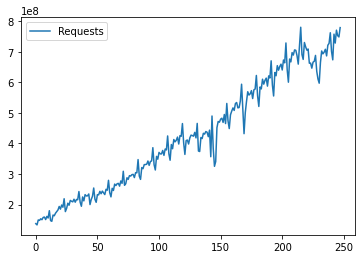

In [5]:
df.plot()

In [6]:
df=df.reset_index()['Requests']

In [11]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [15]:
# Data after scaled
print(df)

[[0.00634027]
 [0.        ]
 [0.02507827]
 [0.02291704]
 [0.03097455]
 [0.02643306]
 [0.0379377 ]
 [0.03979098]
 [0.02713994]
 [0.04333359]
 [0.03500856]
 [0.07192771]
 [0.02181532]
 [0.01823284]
 [0.04993546]
 [0.04636453]
 [0.05922923]
 [0.06734099]
 [0.0756811 ]
 [0.093364  ]
 [0.07979551]
 [0.10060193]
 [0.08955341]
 [0.13242617]
 [0.06739136]
 [0.0833704 ]
 [0.10980722]
 [0.09961484]
 [0.1239209 ]
 [0.11965403]
 [0.11673619]
 [0.12989825]
 [0.11497534]
 [0.12869608]
 [0.12722703]
 [0.1687771 ]
 [0.11495231]
 [0.09433438]
 [0.14149919]
 [0.12166148]
 [0.15312442]
 [0.14643325]
 [0.14720094]
 [0.15648725]
 [0.10288993]
 [0.12888126]
 [0.14493328]
 [0.1867009 ]
 [0.12993472]
 [0.11434619]
 [0.15316368]
 [0.15191567]
 [0.16985706]
 [0.1577564 ]
 [0.17108451]
 [0.16196309]
 [0.15356504]
 [0.18035077]
 [0.17538772]
 [0.22558166]
 [0.16308455]
 [0.14186983]
 [0.18528178]
 [0.17416629]
 [0.20637065]
 [0.1990209 ]
 [0.20826765]
 [0.21014827]
 [0.19614559]
 [0.22249499]
 [0.21026166]
 [0.27

In [16]:
##splitting dataset into train and test split
training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [17]:
training_size,test_size

(161, 87)

In [40]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [54]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [55]:
X_test.shape

(36, 50)

In [56]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(df.shape)

(110, 50, 1)
(36, 50, 1)
(248, 1)


In [61]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [97]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(50,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [98]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 569ms/step - loss: 0.1123 - val_loss: 0.2473
Epoch 2/100
2/2 [==============================] - 0s 53ms/step - loss: 0.0279 - val_loss: 0.0057
Epoch 3/100
2/2 [==============================] - 0s 61ms/step - loss: 0.0115 - val_loss: 0.0306
Epoch 4/100
2/2 [==============================] - 0s 51ms/step - loss: 0.0191 - val_loss: 0.0051
Epoch 5/100
2/2 [==============================] - 0s 52ms/step - loss: 0.0038 - val_loss: 0.0453
Epoch 6/100
2/2 [==============================] - 0s 53ms/step - loss: 0.0051 - val_loss: 0.0917
Epoch 7/100
2/2 [==============================] - 0s 53ms/step - loss: 0.0100 - val_loss: 0.1021
Epoch 8/100
2/2 [==============================] - 0s 51ms/step - loss: 0.0101 - val_loss: 0.0819
Epoch 9/100
2/2 [==============================] - 0s 52ms/step - loss: 0.0064 - val_loss: 0.0504
Epoch 10/100
2/2 [==============================] - 0s 52ms/step - loss: 0.0034 - val_loss: 0.0239
Epoch 11/100
2/2 [

In [100]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [101]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [102]:
## Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

369138882.8743156

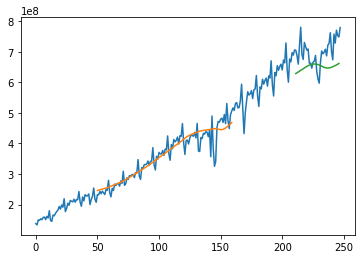

In [103]:
### Plotting 
# shift train predictions for plotting
look_back=50
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()